In [1]:
from interaction_inference import simulation
from interaction_inference import correlation
from interaction_inference import optimization
from interaction_inference import dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import tqdm

In [2]:
rng = np.random.default_rng()

# $X_{1}$ $X_{2}$ $X_{3}$ $X_{4}$ Investigation

## Simulation

In [9]:
# settings
rate_1 = 5
rate_2 = 5
int_str_1 = 10
int_str_2 = 10
cells = 1000

# dataframes
counts_df = pd.DataFrame(index=[f"Gene-pair-{i}" for i in range(4)], columns=[f"Cell-{j}" for j in range(cells)])

# Set reaction rate parameters
params_1 = {
    'k_tx_1': rate_1,
    'k_tx_2': rate_1,
    'k_deg_1': 1,
    'k_deg_2': 1,
    'k_reg': int_str_1
}

# simulate (x1, x2) interacting samples from model
x1_x2 = simulation.gillespie_birth_death(params_1, cells)

# Set reaction rate parameters
params_2 = {
    'k_tx_1': rate_2,
    'k_tx_2': rate_2,
    'k_deg_1': 1,
    'k_deg_2': 1,
    'k_reg': int_str_2
}

# simulate (x3, x4) interacting samples from model
x3_x4 = simulation.gillespie_birth_death(params_2, cells)

# split into x1, x2, x3, x4
x1 = [x[0] for x in x1_x2]
x2 = [x[1] for x in x1_x2]
x3 = [x[0] for x in x3_x4]
x4 = [x[1] for x in x3_x4]

# create (x1, x3), (x1, x4), (x2, x3) and (x2, x4) pairs
x1_x3 = list(zip(x1, x3))
x1_x4 = list(zip(x1, x4))
x2_x3 = list(zip(x2, x3))
x2_x4 = list(zip(x2, x4))

# store counts
counts_df.iloc[0] = x1_x3
counts_df.iloc[1] = x1_x4
counts_df.iloc[2] = x2_x3
counts_df.iloc[3] = x2_x4

# construct dataset object
data = dataset.Dataset("X1X2X3X4")

# store information
data.count_dataset = counts_df
data.cells = cells
data.gene_pairs = 4
data.beta = np.array([1.0 for j in range(cells)])

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 28.45it/s]


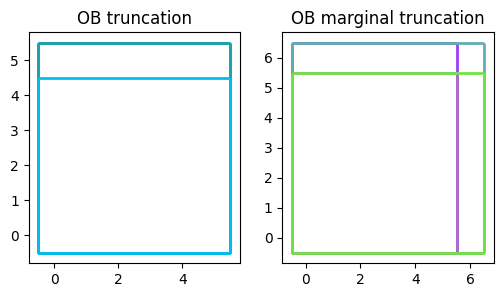

100%|██████████| 4/4 [00:00<00:00,  8.07it/s]


In [10]:
data.compute_moments(tqdm_disable=False)
data.compute_probabilities(display=True, tqdm_disable=False)
data.compute_fm(tqdm_disable=False)

## Independent feasibility test

In [11]:
constraints = [
    "downsampled_marginal_probability_1",
    "downsampled_marginal_CME_1",
    "k_deg_1"
]

print("X1, X1, X2, X2")

single_sample = optimization.Optimization(data, constraints, tqdm_disable=True)

constraints = [
    "downsampled_marginal_probability_2",
    "downsampled_marginal_CME_2",
    "k_deg_2"
]

print("X3, X4, X3, X4")

single_sample = optimization.Optimization(data, constraints, tqdm_disable=True)

X1, X1, X2, X2
Optimization status: INFEASIBLE
Runtime: 0.06299996376037598
Optimization status: INFEASIBLE
Runtime: 0.0009999275207519531
Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: INFEASIBLE
Runtime: 0.0009999275207519531
X3, X4, X3, X4
Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: INFEASIBLE
Runtime: 0.0019998550415039062
Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: INFEASIBLE
Runtime: 0.0010001659393310547


## Interacting feasibility test

In [12]:
constraints = [
    "joint_probability",
    "CME",
    "k_deg_1"
]

print("(X1, X3), (X1, X4), (X2, X3), (X2, X4)")

pair_sample = optimization.Optimization(data, constraints, tqdm_disable=True)

(X1, X3), (X1, X4), (X2, X3), (X2, X4)
Optimization status: INFEASIBLE
Runtime: 0.11700010299682617
Optimization status: INFEASIBLE
Runtime: 0.05099987983703613
Optimization status: INFEASIBLE
Runtime: 0.09399986267089844
Optimization status: INFEASIBLE
Runtime: 0.029999971389770508


In [13]:
constraints = [
    "downsampled_probability",
    "downsampled_CME",
    "k_deg_1"
]

print("(X1, X3), (X1, X4), (X2, X3), (X2, X4)")

pair_sample = optimization.Optimization(data, constraints, tqdm_disable=True)

(X1, X3), (X1, X4), (X2, X3), (X2, X4)
Optimization status: INFEASIBLE
Runtime: 0.21299982070922852
Optimization status: INFEASIBLE
Runtime: 0.13300013542175293
Optimization status: INFEASIBLE
Runtime: 0.09099984169006348
Optimization status: INFEASIBLE
Runtime: 0.05500006675720215


## Moment test

In [14]:
constraints = [
    "dummy_moment"
]

print("(X1, X3), (X1, X4), (X2, X3), (X2, X4)")

pair_sample = optimization.Optimization(data, constraints, tqdm_disable=True)

(X1, X3), (X1, X4), (X2, X3), (X2, X4)
Optimization status: OPTIMAL
Runtime: 0.03800010681152344
Optimization status: OPTIMAL
Runtime: 0.01699995994567871
Optimization status: OPTIMAL
Runtime: 0.0070002079010009766
Optimization status: OPTIMAL
Runtime: 0.0010001659393310547
